# Pymaceuticals Inc.
---

### Analysis

- The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. After removing any duplicate data,the study consists of 248 mice made of 51% male and 49% female mice. A total of 230 mice underwent treatment regimen using Capomulin.

- The correlation coefficient (r^2 value = 0.84) determines a moderate positive linear relationship between the mouse weight and average observed tumor volume for the entire Capomulin treatment regimen. Higher R-squared values represent smaller differences between the observed data and the fitted value. This means the model explains 84% of all variation in the dependent variable around its mean.
 
- Mice treated with either Capomulin or Ramicane regimen have the smallest final tumor volume, compared to those treated with either Infubinol or Ceftamin regimen. Overall, Ramicane had the strongest impact with a mean tumor volume 40.216745	with a standard deviation of 4.846308. Capomulin is a very competitive close second strongest treatment with a mean tumor volume 40.675741	with a standard deviation of 4.994774. All other regimens resulted in a mean tumor volume above 52 mm^3.

In [132]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [96]:
# Checking the number of mice.
mice_tot = results_df["Mouse ID"].nunique()
mice_tot

249

In [97]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_double = results_df.loc[results_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_double

array(['g989'], dtype=object)

In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_double_df = results_df.loc[results_df["Mouse ID"] == "g989", :]
mouse_double_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = results_df[results_df['Mouse ID'].isin(mouse_double)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
# Checking the number of mice in the clean DataFrame.
mice_total = clean_df["Mouse ID"].nunique()
mice_total

248

In [130]:
# Count the number of mice in each drug regimen
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
Median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
Variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
Std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()
                                                  
# Assemble the resulting series into a single summary DataFrame.
summarystats_df = pd.DataFrame({"Mean Tumor Volume": Mean,
                                "Median Tumor Volume": Median,
                                "Tumor Volume Variance": Variance,
                                "Tumor Volume St. Dev": Std,
                                "Tumor Volume St. Error": sem})

summarystats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev,Tumor Volume St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summarystats_2=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line
summarystats_2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

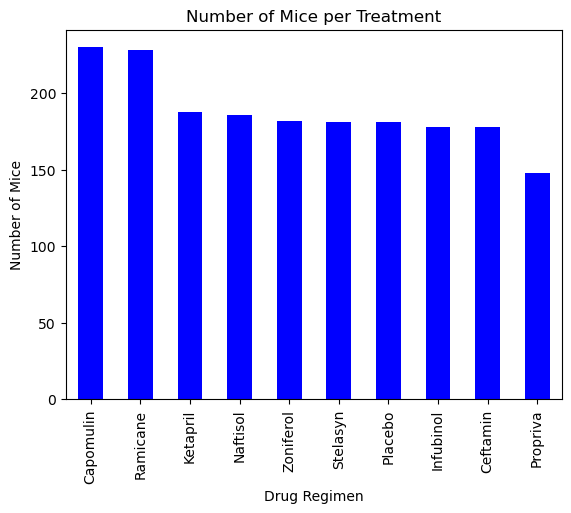

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a group series using the 'Drug Regimen' column
mice_count = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

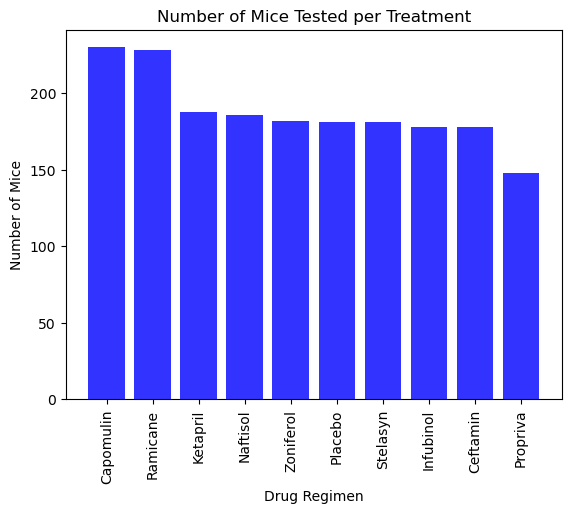

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

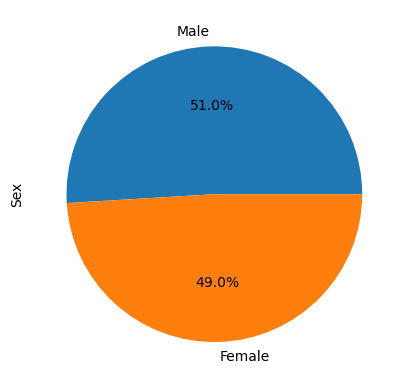

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

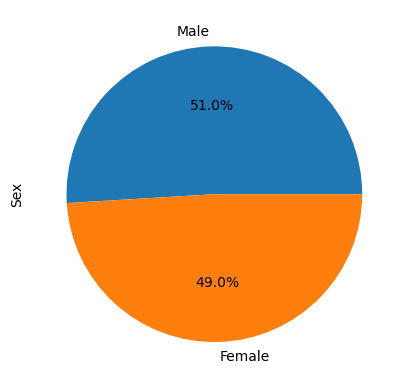

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Top4=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|(clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin") ,:]

# Start by getting the last (greatest) timepoint for each mouse
Top4=Top4.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Top4=pd.merge(Top4,clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
Top4

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(100):
    DR=Top4.iloc[i,:]["Drug Regimen"]
    Tum=Top4.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = Top4.loc[Top4["Drug Regimen"]==Treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")

    #Print potential outliers
    for Tumor in Tumors[Num]:
        if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")



The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infub

/var/folders/b7/jt29m60j4hd6pw18z289tgh40000gn/T/ipykernel_19721/3221770777.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Treatments)


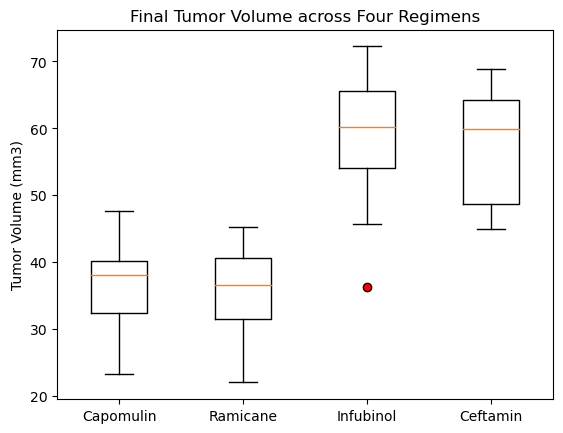

In [122]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor = "r", )    
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across Four Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(Treatments)
ax1.boxplot(Tumors, flierprops = red_circle)

plt.show()
    

## Line and Scatter Plots

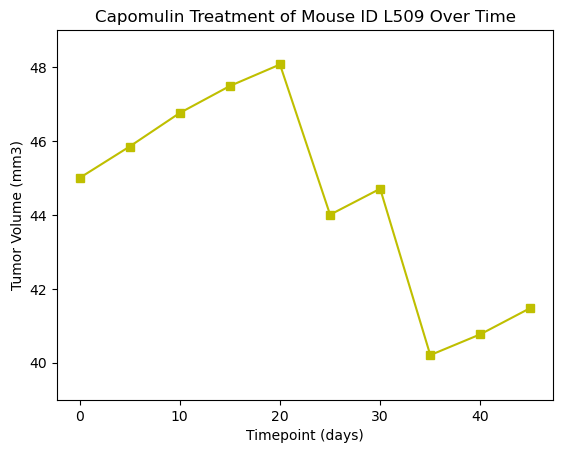

In [127]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Single_Mouse=clean_df.loc[clean_df["Mouse ID"]=='l509',:]
x_axis=Single_Mouse["Timepoint"].count()
plt.plot(Single_Mouse["Timepoint"],Single_Mouse["Tumor Volume (mm3)"],marker='s',color="y")
plt.title("Capomulin Treatment of Mouse ID L509 Over Time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(39,49)
plt.show()

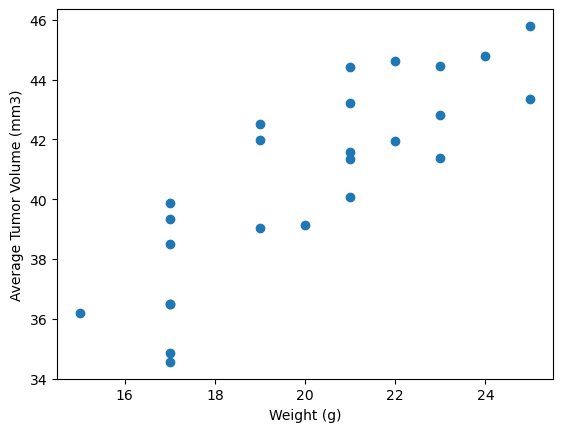

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


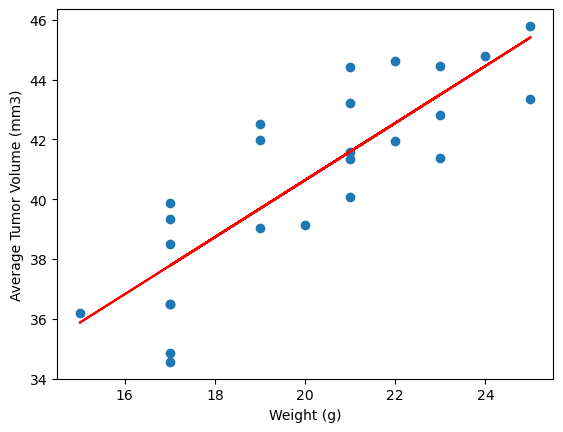

In [129]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()